# Set game - O jogo dos conjuntos

Set game é jogado com cartas que contém quatro atributos: quantidade, cor, formato e textura, e cada um deles pode assumir três valores diferentes que serão explicados mais à frente. O objetivo do jogo é encontrar conjuntos (tradução de set, que é o nome do jogo) de três cartas que, para cada um dos quatro atributos, possuam o mesmo valor ou três cartas que possuam valores diferentes.

## Regras do jogo


A seguir são descritos os quatro atributos que cada carta pode possuir:
* Quantidade: cada carta possui 1, 2 ou 3 figuras;
* Cor: a(s) figura(s) em cada carta podem assumir três cores: vermelha, verde ou roxa;
* Formato: a(s) figura(s) em cada carta podem assumir três formatos: oval, losangular ou uma forma curva que assemelha a um S;
* Textura: cada figura pode possuir três texturas: vazia, hachurada ou completamente pintada.


Por exemplo: (é um SET!)
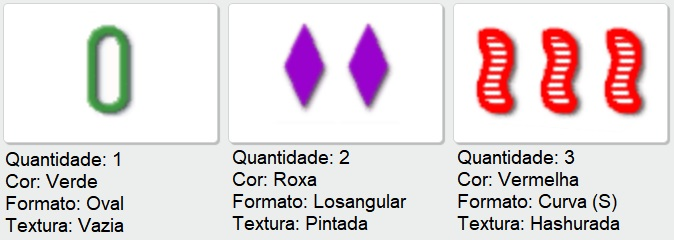

Cada combinação de atributos corresponde a exatamente uma carta, para um total de 81 (3 $\times$ 3 $\times$ 3 $\times$ 3 ) cartas no baralho. De maneira aleatória, 12 cartas são reveladas e o jogador que encontrar mais rápido um conjunto de 3 cartas no meio das 12, vence a rodada. As três cartas do conjunto são então removidas e outras três cartas são reveladas, com o jogo continuando até que o baralho seja concluído.

Além disso, se nenhum jogador conseguir encontrar um conjunto dentro do grupo de 12 cartas depois de um certo tempo, outras três cartas são reveladas (com a concordância de todos os jogadores). O próximo conjunto reivindicado não será substituído, pois já haverá pelo menos 12 cartas em exibição. Apesar de bastante improvável, é realmente possível que um grupo de 12 cartas não contenha nenhum conjunto; na verdade, é possível que um grupo de até 20 cartas não contenha nenhum conjunto. 

Nesse [link](https://math.stackexchange.com/questions/202862/in-the-card-game-set-whats-the-probability-of-a-set-existing-in-n-cards/203146#203146), há a explicação da probabilidade de existir um conjunto em um grupo de 1 a 21 cartas (0% até 100%). 

## Vamos ao solver!

Cada carta será representada por um vetor de tamanho 4 da forma: DC00 = [Q C F T], isto é, a primeira coluna representa a quantidade, a segunda a cor, a terceira o formato e a última a textura. Cada espaço pode assumir três valores diferentes: 1, 2 ou 3, que são:

* Quantidade: cada número significa a quantidade correspondente;
* Cor: 1 = Vermelha, 2 = Verde, 3 = Roxa
* Formato: 1 = Losangular, 2 = Oval, 3 = Curva (S)
* Textura: 1 = Vazia, 2 = Hashurada, 3 = Pintada

Abaixo encontra-se o baralho completo e, pensando em forma matricial, cada carta já foi definida como "DC$nm$", onde $n$ é o valor da linha onde se encontra e $m$ a coluna.

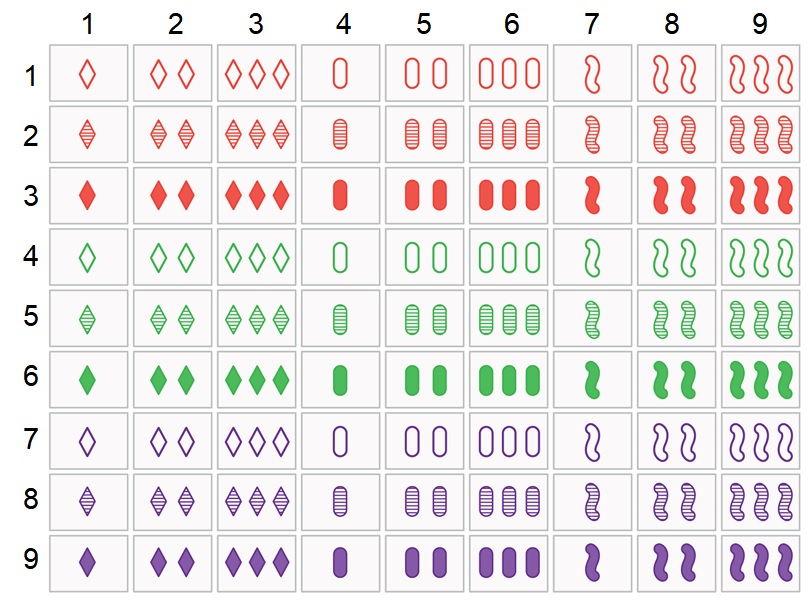

In [2]:
#Por exemplo:
print("Carta 2,3:",DC23,"    ", "Carta 4,7:",DC47)

Carta 2,3:[3 1 1 2]    Carta 4,7:[1 2 3 1]

Para codificar o set game, precisamos de uma restrição que garanta que serão selecionadas 3 cartas, não mais e nem menos, e uma restrição para cada atributo que garanta que as cartas selecionadas formem um set. 

Como os atributos dos sets que selecionamos são da forma (1 1 1) ; (2 2 2) ; (3 3 3) ; ou um rearranjo de (1 2 3), temos que a soma será sempre igual a 3, 6 ou 9, e nos casos inválidos a soma **nunca** resulta em um múltiplo de 3, portanto para cumprir a segunda restrição mencionada acima basta igualar essas somas a um dos três números múltiplos de três, por isso as restrições são da forma $3\times(1+a+b)$ onde $a$ e $b$ só podem assumir o valor 0 ou 1.

In [3]:
using JuMP, GLPK

In [6]:
function set_game(S)
    setgame = Model(GLPK.Optimizer)
# Variáveis
    @variable(setgame, x[1:12], Bin); #Vetor binário para decidir quais cartas farão parte(1) ou não(0) do set;
    @variable(setgame, b[1:8], Bin);   #Vetor binário para gerar 8 auxiliares para restrições de ser ou não um set válido; 
# Restrições
    @constraint(setgame, sum(x[j] for j=1:12) .== 3); #Escolha exatamente 3 cartas;
    @constraint(setgame, sum(x[i]*S[i,1] for i=1:12) == 3*(1+b[1]+b[2]) ); #Verificando se as quantidades das cartas selecionadas formam um set; 
    @constraint(setgame, sum(x[i]*S[i,2] for i=1:12) == 3*(1+b[3]+b[4]) ); #Verificando se as cores das cartas selecionadas formam um set;
    @constraint(setgame, sum(x[i]*S[i,3] for i=1:12) == 3*(1+b[5]+b[6]) ); #Verificando se os formatos das cartas selecionadas formam um set;
    @constraint(setgame, sum(x[i]*S[i,4] for i=1:12) == 3*(1+b[7]+b[8]) ); #Verificando se as texturas das cartas selecionadas formam um set;
    
    optimize!(setgame);
    print_set(S,x)

end

set_game (generic function with 1 method)

## Testando o solver
### Exemplo 1
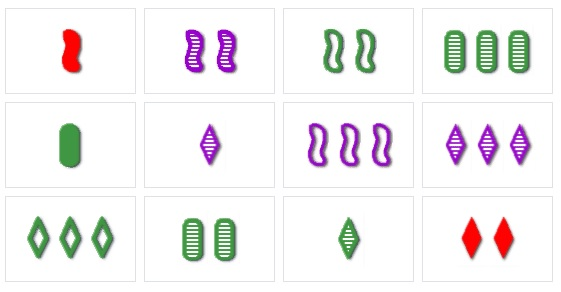

In [7]:
S = [DC32; DC37; DC43; DC48; DC51; DC55; DC56; DC64; DC79; DC81; DC83; DC88]
set_game(S)

 
Quantidade:2   Cor:Vermelha   Formato:Losangular   Textura:Pintada 
Quantidade:3   Cor:Verde   Formato:Losangular   Textura:Vazia 
Quantidade:1   Cor:Roxa   Formato:Losangular   Textura:Hashurada

### Exemplo 2
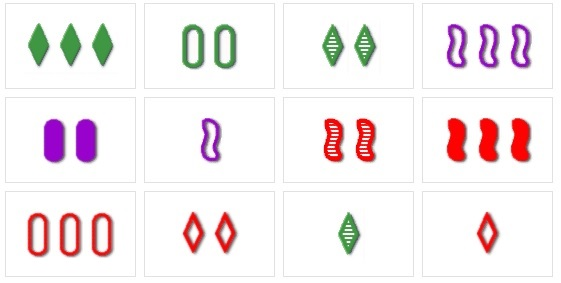

In [8]:
S = [DC11; DC12; DC16; DC28; DC39; DC45; DC51; DC52; DC63; DC77; DC79; DC95]
set_game(S)

 
Quantidade:1   Cor:Vermelha   Formato:Losangular   Textura:Vazia 
Quantidade:2   Cor:Verde   Formato:Oval   Textura:Vazia 
Quantidade:3   Cor:Roxa   Formato:Curva (S)   Textura:Vazia

### Exemplo 3 (não há solução)
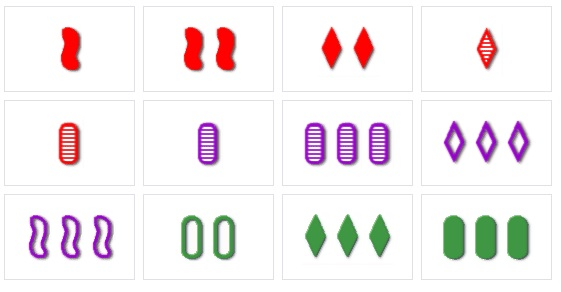

In [9]:
S = [DC21; DC24; DC32; DC37; DC38; DC45; DC63; DC66; DC73; DC79; DC84; DC86]
set_game(S)

LoadError: [91mResult index of attribute MathOptInterface.VariablePrimal(1) out of bounds. There are currently 0 solution(s) in the model.[39m

Referências:

[Regras](https://brilliant.org/wiki/set-game/)

[Imagens](https://www.quantamagazine.org/set-proof-stuns-mathematicians-20160531/)

[Imagens dos exemplos](https://www.freepiecoupon.com/set)

[Site para mais detalhes de probabilidades do jogo](https://math.stackexchange.com/questions/202862/in-the-card-game-set-whats-the-probability-of-a-set-existing-in-n-cards/203146#203146)

In [1]:
#Definindo os valores de DC##:
DC11 = [1 1 1 1] 
DC12 = [2 1 1 1] 
DC13 = [3 1 1 1] 
DC14 = [1 1 2 1]  
DC15 = [2 1 2 1]
DC16 = [3 1 2 1]  
DC17 = [1 1 3 1]  
DC18 = [2 1 3 1]  
DC19 = [3 1 3 1]

DC21 = [1 1 1 2]  
DC22 = [2 1 1 2] 
DC23 = [3 1 1 2] 
DC24 = [1 1 2 2]
DC25 = [2 1 2 2]
DC26 = [3 1 2 2]  
DC27 = [1 1 3 2]  
DC28 = [2 1 3 2] 
DC29 = [3 1 3 2]

DC31 = [1 1 1 3]  
DC32 = [2 1 1 3] 
DC33 = [3 1 1 3] 
DC34 = [1 1 2 3]
DC35 = [2 1 2 3]
DC36 = [3 1 2 3] 
DC37 = [1 1 3 3] 
DC38 = [2 1 3 3] 
DC39 = [3 1 3 3]

DC41 = [1 2 1 1] 
DC42 = [2 2 1 1]  
DC43 = [3 2 1 1]  
DC44 = [1 2 2 1]  
DC45 = [2 2 2 1] 
DC46 = [3 2 2 1] 
DC47 = [1 2 3 1]  
DC48 = [2 2 3 1]  
DC49 = [3 2 3 1]

DC51 = [1 2 1 2] 
DC52 = [2 2 1 2]
DC53 = [3 2 1 2]  
DC54 = [1 2 2 2]  
DC55 = [2 2 2 2]  
DC56 = [3 2 2 2] 
DC57 = [1 2 3 2]  
DC58 = [2 2 3 2]  
DC59 = [3 2 3 2]
            
DC61 = [1 2 1 3]  
DC62 = [2 2 1 3]
DC63 = [3 2 1 3]
DC64 = [1 2 2 3] 
DC65 = [2 2 2 3]
DC66 = [3 2 2 3]
DC67 = [1 2 3 3]  
DC68 = [2 2 3 3]  
DC69 = [3 2 3 3]
            
DC71 = [1 3 1 1]  
DC72 = [2 3 1 1]  
DC73 = [3 3 1 1] 
DC74 = [1 3 2 1]
DC75 = [2 3 2 1] 
DC76 = [3 3 2 1] 
DC77 = [1 3 3 1] 
DC78 = [2 3 3 1]  
DC79 = [3 3 3 1]
            
DC81 = [1 3 1 2]
DC82 = [2 3 1 2]
DC83 = [3 3 1 2] 
DC84 = [1 3 2 2]
DC85 = [2 3 2 2] 
DC86 = [3 3 2 2] 
DC87 = [1 3 3 2] 
DC88 = [2 3 3 2]  
DC89 = [3 3 3 2]
           
DC91 = [1 3 1 3]  
DC92 = [2 3 1 3] 
DC93 = [3 3 1 3]  
DC94 = [1 3 2 3]  
DC95 = [2 3 2 3]  
DC96 = [3 3 2 3]  
DC97 = [1 3 3 3]  
DC98 = [2 3 3 3] 
DC99 = [3 3 3 3]

1×4 Array{Int64,2}:
 3  3  3  3

In [5]:
#Função para retornar os parâmetros das cartas escolhidas
function print_set(S,x)
    C = Dict([(1, "Vermelha"), (2, "Verde"), (3, "Roxa")])
    F = Dict([(1, "Losangular"), (2, "Oval"), (3, "Curva (S)")])
    T = Dict([(1, "Vazia"), (2, "Hashurada"), (3, "Pintada")])
    y = zeros(3,4)
    o = 1
    for i = 1:12
        if value.(x[i])>0.5
            y[o,1] = S[i,1]
            y[o,2] = S[i,2]
            y[o,3] = S[i,3]
            y[o,4] = S[i,4]
            o = o + 1
        end
    end
    for j = 1:3
        print(" \n", "Quantidade:",string(Int(y[j,1])) ,"   Cor:", C[y[j,2]] , "   Formato:", F[y[j,3]] , "   Textura:" , T[y[j,4]])
    end
end

print_set (generic function with 1 method)